In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data Preprocessing
Loading the dataset

In [2]:
df = pd.read_csv("zomato.csv",encoding='ISO-8859-1')

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.keys()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# Feature Engineering

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer

In [6]:

mlb = MultiLabelBinarizer()

In [7]:
 new_cuisine=pd.DataFrame(mlb.fit_transform(df['Cuisines'].astype(str)))

In [8]:
new_cuisine.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1,1,0,0,0,0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [9]:
 restaurant_name=pd.DataFrame(mlb.fit_transform(df['Restaurant Name'].astype(str)))
new_city=pd.DataFrame(mlb.fit_transform(df['City'].astype(str)))
new_address=pd.DataFrame(mlb.fit_transform(df['Address'].astype(str)))
new_locality=pd.DataFrame(mlb.fit_transform(df['Locality'].astype(str)))
locality_verbose=pd.DataFrame(mlb.fit_transform(df['Locality Verbose'].astype(str)))
df['new cost'] = 0

In [10]:
#Coverting all various currencies into dollar

In [11]:
d = {'Botswana Pula(P)':0.095, 'Brazilian Real(R$)':0.266,'Dollar($)':1,'Emirati Diram(AED)':0.272,
    'Indian Rupees(Rs.)':0.014,'Indonesian Rupiah(IDR)':0.00007,'NewZealand($)':0.688,'Pounds(\x8c£)':1.314,
    'Qatari Rial(QR)':0.274,'Rand(R)':0.072,'Sri Lankan Rupee(LKR)':0.0055,'Turkish Lira(TL)':0.188}

df['new cost'] = df['Average Cost for two'] * df['Currency'].map(d)

In [12]:
df['cuisine'] = 0

# Principle Component Analysis

In [13]:

from sklearn.decomposition import PCA

In [14]:

pca=PCA()

In [15]:
cuisine = pca.fit_transform(new_cuisine)
pca = PCA(n_components=1)  
cuisine = pca.fit_transform(cuisine)
df['cuisine']=cuisine

In [16]:
df['cuisine'].head()

0    0.705835
1    1.787682
2    0.014785
3    0.610066
4    0.877396
Name: cuisine, dtype: float64

In [17]:
restaurant = pca.fit_transform(restaurant_name)
pca = PCA(n_components=1)  
restaurant = pca.fit_transform(restaurant)
df['restaurant']=restaurant

In [18]:
city = pca.fit_transform(new_city)
pca = PCA(n_components=1)  
city = pca.fit_transform(city)
df['city']=city

In [19]:
address = pca.fit_transform(new_address)
pca = PCA(n_components=1)  
address = pca.fit_transform(address)
df['address']=address

In [20]:
locality = pca.fit_transform(new_locality)
pca = PCA(n_components=1)  
locality = pca.fit_transform(locality)
df['locality']=locality

In [21]:
locality_verbose = pca.fit_transform(locality_verbose)
pca = PCA(n_components=1)  
locality_verbose = pca.fit_transform(locality_verbose)
df['locality_verbose']=locality_verbose

In [22]:
cuisine.shape

(9551, 1)

# Label Encoder

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [24]:
df['Has Table booking'] = labelencoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = labelencoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = labelencoder.fit_transform(df['Is delivering now'])
df['Rating text']= labelencoder.fit_transform(df['Rating text'])
df['Rating text'].head()

0    1
1    1
2    5
3    1
4    1
Name: Rating text, dtype: int32

In [25]:
df['City'] = labelencoder.fit_transform(df['City'])
df['Rating color'] = labelencoder.fit_transform(df['Rating color'])
df['Switch to order menu'] = labelencoder.fit_transform(df['Switch to order menu'])

In [26]:
df.rename(columns = {"Aggregate rating":"Aggregate_rating", 
                    "Price range":"Price_range",
                    "Rating color":"Rating_color",
                      "Restaurant ID":"Restaurant_id",
                      "new cost":"new_cost",
                        "Rating text":"Rating_text"}, 
                                 inplace = True)

In [27]:
zomato=df.drop(['Restaurant Name','Cuisines','City','Address','Locality','Locality Verbose',
       'Average Cost for two', 'Currency'],axis=1)

# Updated Dataset

In [28]:

zomato.head()

,Restaurant_id,Country Code,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,new_cost,cuisine,restaurant,city,address,locality,locality_verbose
0,6317637,162,121.027535,14.565443,1,0,0,0,3,4.8,0,1,314,104.5,0.705835,-0.002117,0.936396,0.616067,0.305670,1.031834
1,6304287,162,121.014101,14.553708,1,0,0,0,3,4.5,0,1,591,114.0,1.787682,-0.897940,0.936396,0.390382,-0.218009,0.527627
2,6300002,162,121.056831,14.581404,1,0,0,0,4,4.4,1,5,270,380.0,0.014785,1.142684,1.503840,0.801742,-0.377285,0.995238
3,6318506,162,121.056475,14.585318,0,0,0,0,4,4.9,0,1,365,142.5,0.610066,-1.614810,1.503840,0.662654,0.068891,1.237404
4,6314302,162,121.057508,14.584450,1,0,0,0,4,4.8,0,1,229,142.5,0.877396,-0.620425,1.503840,0.679164,0.068891,1.237404


In [29]:

zomato.shape

(9551, 20)

In [30]:
zomato['Has Online delivery'].value_counts()

0    7100
1    2451
Name: Has Online delivery, dtype: int64

In [31]:

zomato['Has Table booking'].value_counts()

0    8393
1    1158
Name: Has Table booking, dtype: int64

In [32]:
df['Is delivering now'].value_counts()

0    9517
1      34
Name: Is delivering now, dtype: int64

In [33]:

zomato['Switch to order menu'].value_counts()

0    9551
Name: Switch to order menu, dtype: int64

In [34]:

zomato['Price_range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price_range, dtype: int64

# Data Visualization
Plotting the graph for Votes with respect to Aggregate rating using seaborn

(1.0, 5.0)

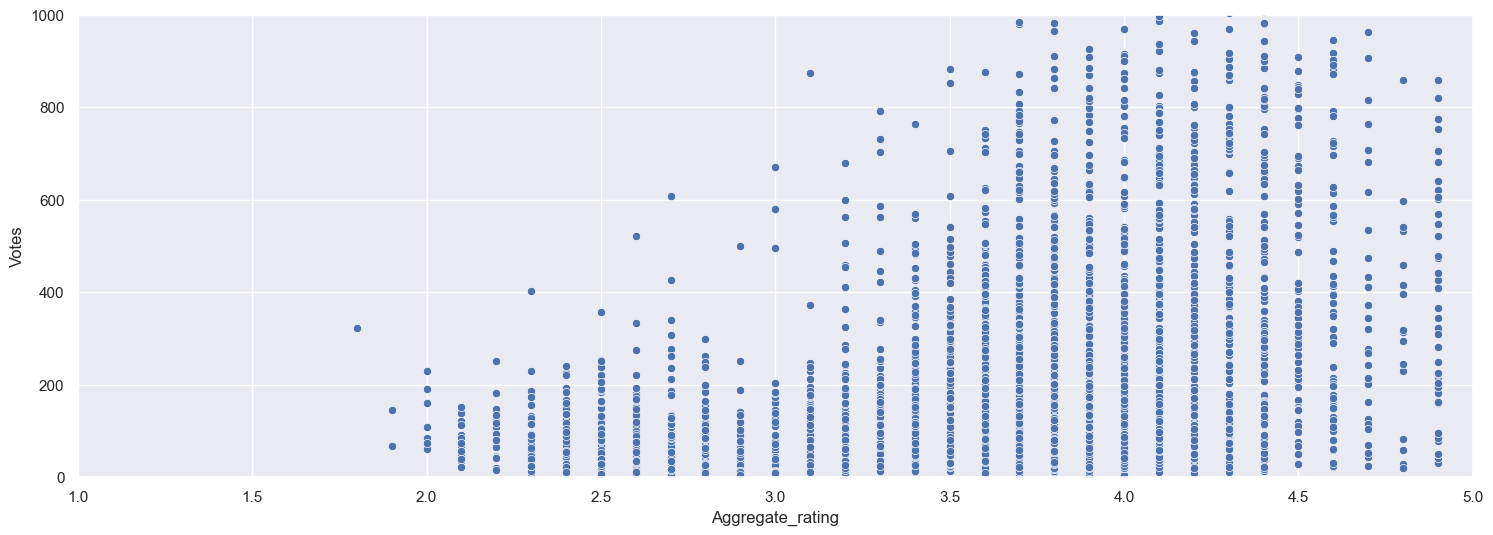

In [35]:
sns.set(rc={'figure.figsize':(18,6)})
sns.scatterplot(data=zomato,x='Aggregate_rating',y='Votes')
plt.ylim(0,1000)
plt.xlim(1,5)

<Axes: xlabel='Aggregate_rating', ylabel='count'>

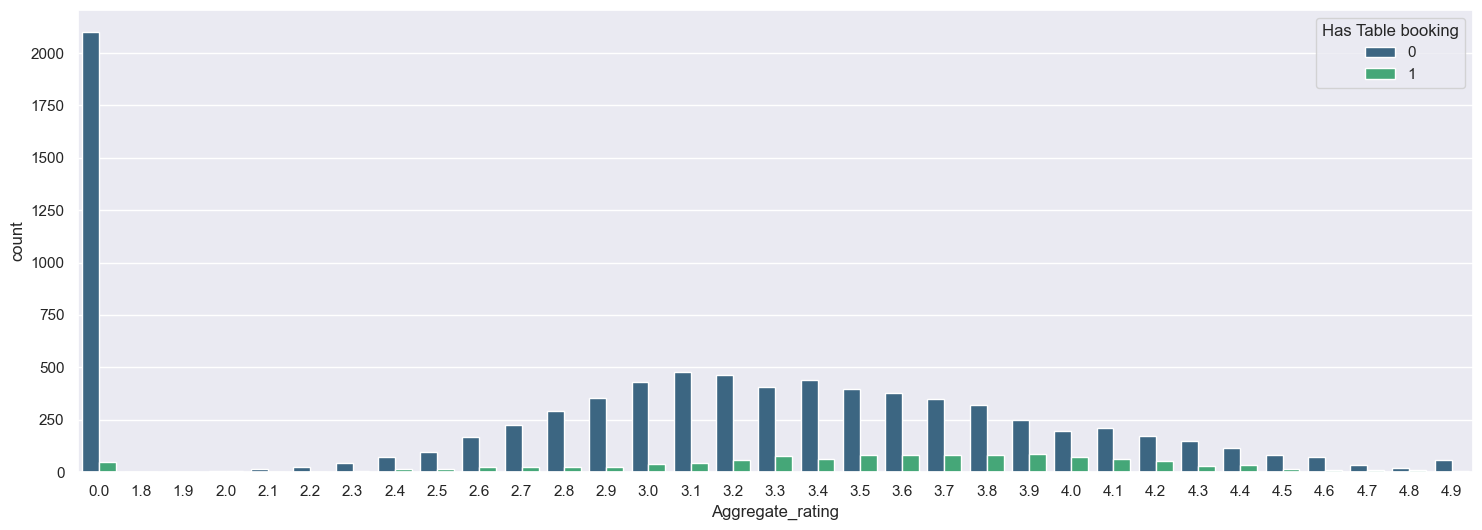

In [36]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=zomato,x='Aggregate_rating',hue='Has Table booking',palette='viridis')

<Axes: xlabel='Aggregate_rating', ylabel='count'>

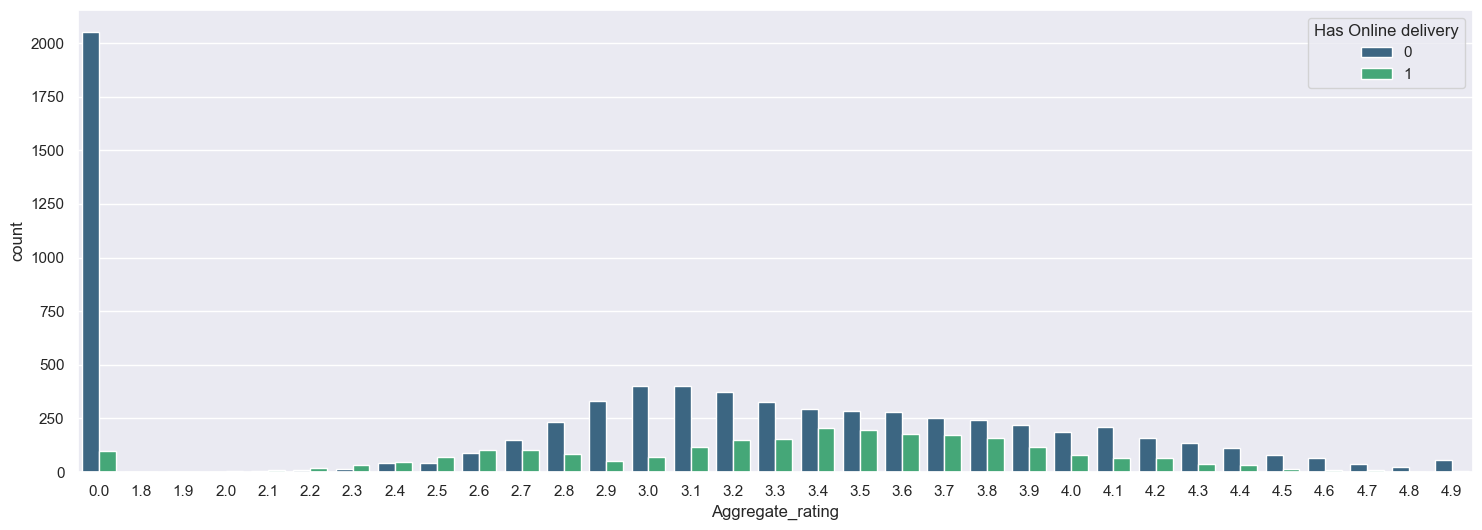

In [37]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=zomato,x='Aggregate_rating',hue='Has Online delivery',palette='viridis')

<Axes: xlabel='Aggregate_rating', ylabel='count'>

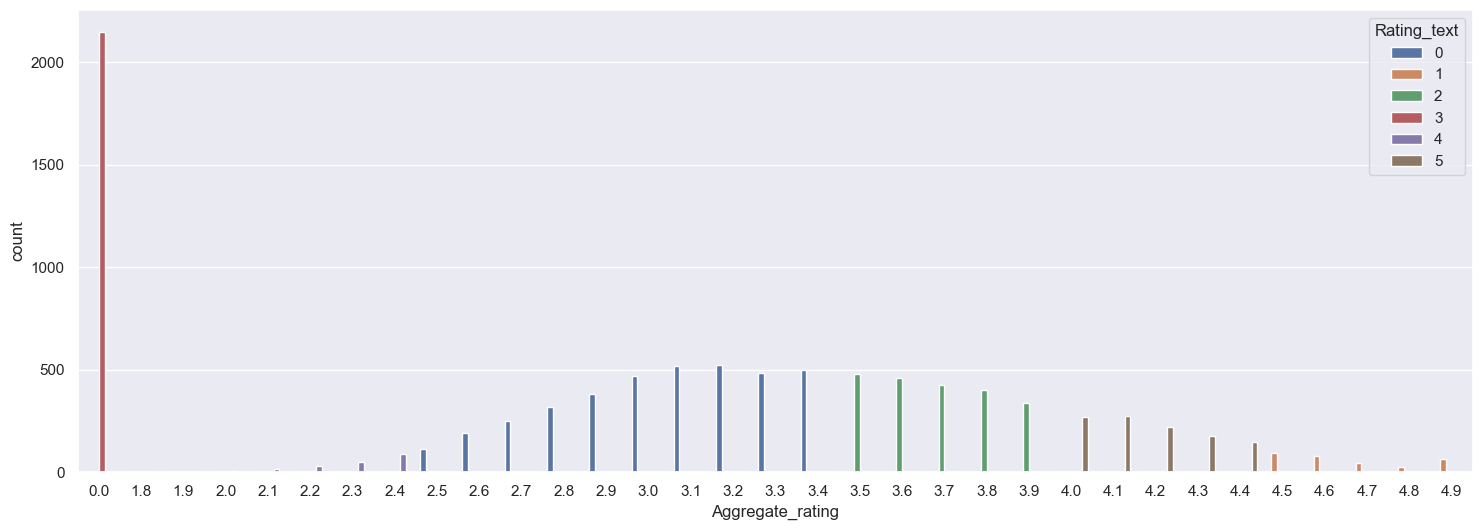

In [38]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=zomato,x='Aggregate_rating',hue='Rating_text')

<Axes: xlabel='Aggregate_rating', ylabel='count'>

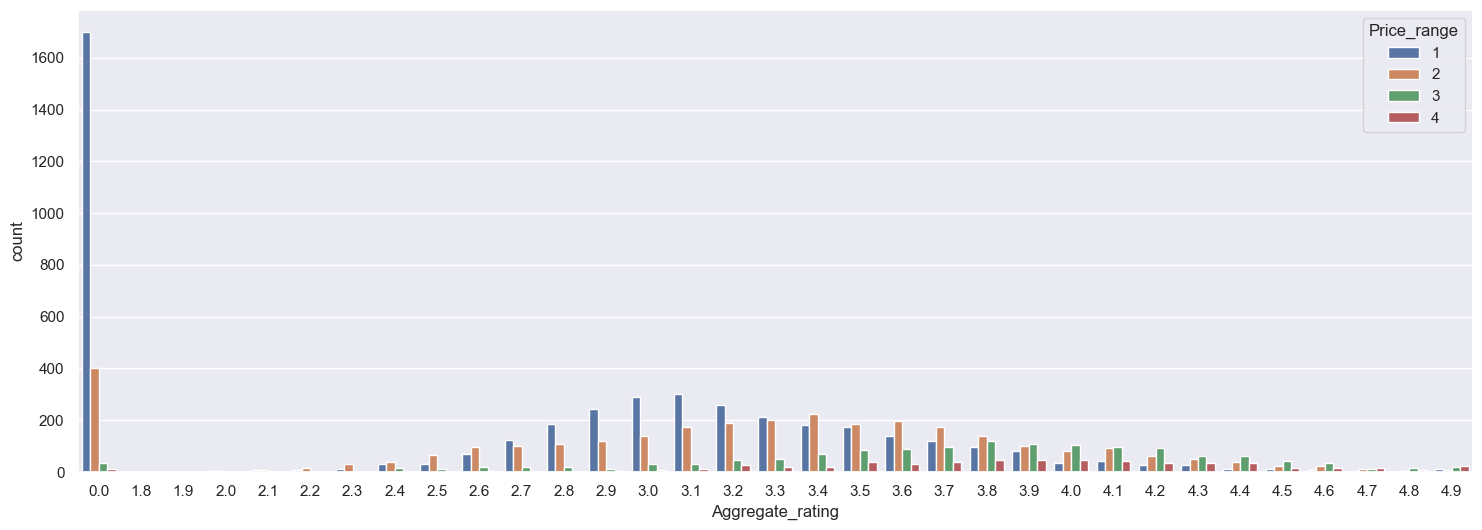

In [39]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot(data=zomato,x='Aggregate_rating',hue='Price_range')

# Feature Selection

<Axes: >

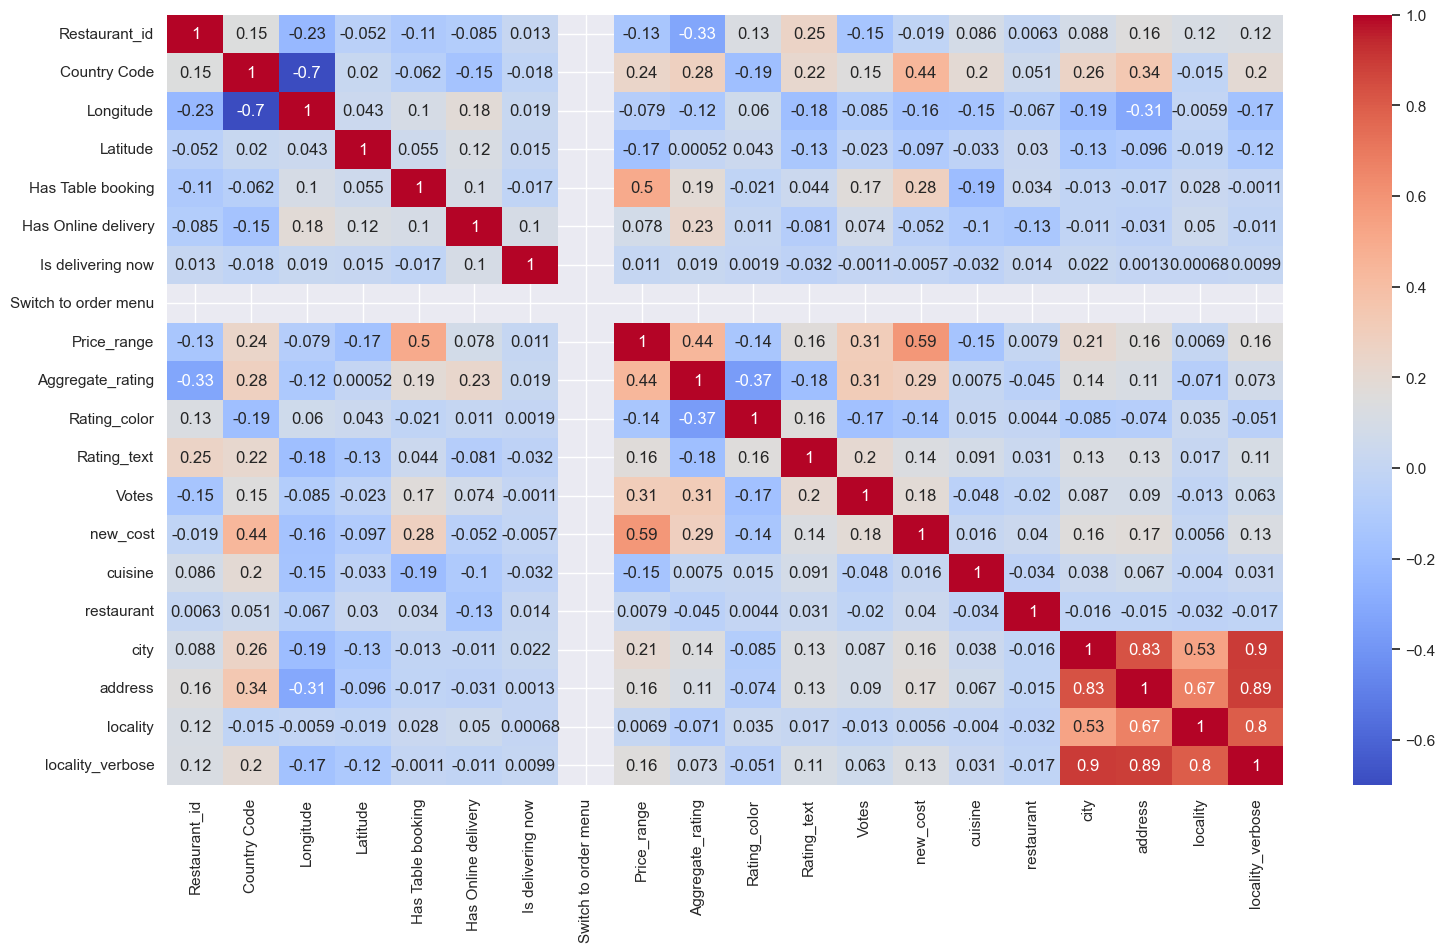

In [40]:
sns.set(rc={'figure.figsize':(18,10)})
sns.heatmap(data=zomato.corr(),cmap='coolwarm',annot=True)


In [41]:
corr=zomato.corr('pearson')
abs(corr['Aggregate_rating']).sort_values(ascending=False)

Aggregate_rating        1.000000
Price_range             0.437944
Rating_color            0.367054
Restaurant_id           0.326212
Votes                   0.313691
new_cost                0.289929
Country Code            0.282189
Has Online delivery     0.225699
Has Table booking       0.189998
Rating_text             0.182662
city                    0.144101
Longitude               0.116818
address                 0.113874
locality_verbose        0.073368
locality                0.070686
restaurant              0.045404
Is delivering now       0.019180
cuisine                 0.007479
Latitude                0.000516
Switch to order menu         NaN
Name: Aggregate_rating, dtype: float64

In [42]:

zomato.head()

,Restaurant_id,Country Code,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,new_cost,cuisine,restaurant,city,address,locality,locality_verbose
0,6317637,162,121.027535,14.565443,1,0,0,0,3,4.8,0,1,314,104.5,0.705835,-0.002117,0.936396,0.616067,0.305670,1.031834
1,6304287,162,121.014101,14.553708,1,0,0,0,3,4.5,0,1,591,114.0,1.787682,-0.897940,0.936396,0.390382,-0.218009,0.527627
2,6300002,162,121.056831,14.581404,1,0,0,0,4,4.4,1,5,270,380.0,0.014785,1.142684,1.503840,0.801742,-0.377285,0.995238
3,6318506,162,121.056475,14.585318,0,0,0,0,4,4.9,0,1,365,142.5,0.610066,-1.614810,1.503840,0.662654,0.068891,1.237404
4,6314302,162,121.057508,14.584450,1,0,0,0,4,4.8,0,1,229,142.5,0.877396,-0.620425,1.503840,0.679164,0.068891,1.237404


In [43]:

zomato.shape

(9551, 20)

In [44]:
zomato = pd.get_dummies(zomato, columns=['Price_range','Rating_text','Has Table booking','Has Online delivery'])

# Linear Regression using sklearn

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
X = np.array(zomato.drop(['Aggregate_rating'], axis=1))
Y = np.array(zomato['Aggregate_rating'])

# Splitting the dataset

In [48]:

from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [50]:

from sklearn.linear_model import LinearRegression

In [51]:

regressor = LinearRegression()

In [52]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [53]:

Y_pred=regressor.predict(X_test)

In [54]:
for i in zip(Y_pred,Y_test):
    print(i)

(3.0428300808999906, 3.2)
(-0.043809281676928435, 0.0)
(3.6428680014978534, 3.7)
(-0.04740860448966977, 0.0)
(-0.04414437110299918, 0.0)
(3.02699091610477, 3.2)
(4.712862125389558, 4.5)
(3.076620536844506, 3.4)
(3.058285048470461, 3.2)
(3.057203107754161, 3.1)
(3.040642459626736, 3.0)
(0.032114705897131834, 0.0)
(3.0350068700855095, 2.6)
(3.032527880554992, 3.4)
(-0.021858522894554255, 0.0)
(0.05516369301796775, 0.0)
(4.690415072588883, 4.6)
(3.024225044619639, 3.1)
(-0.04344161708862515, 0.0)
(3.684082823298022, 3.8)
(0.010931844095488863, 0.0)
(4.283801705270246, 4.1)
(3.635281313493448, 3.9)
(0.015180559783566139, 0.0)
(3.0314538471082177, 3.2)
(3.0155191465368425, 3.4)
(4.155235127399736, 4.1)
(4.689403529953138, 4.9)
(3.01950682760444, 3.2)
(0.028157691761714787, 0.0)
(-0.05297371347546864, 0.0)
(3.715184044157346, 3.9)
(3.062749877380532, 3.1)
(-0.001840064647048223, 0.0)
(3.6091471227118412, 3.5)
(4.59863015579388, 4.5)
(3.6851105573243577, 3.5)
(-0.011444922415051018, 0.0)
(4.1

In [55]:

from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error

In [57]:

mean_squared_error(Y_test,Y_pred)

0.030858117121763826

# Root mean squared error

In [58]:

np.sqrt(mean_squared_error(Y_test,Y_pred))

0.1756647862315149

In [59]:
r2_score(Y_test,Y_pred)

0.9866664433275685

In [60]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.12875240532159224
Mean Squared Error: 0.030858117121763826
Root Mean Squared Error: 0.1756647862315149
